In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
PDEG = 18

#### 1. Data from video ####

In [81]:
#data_file = "../lab_data/video_data/20231128_DSC_1763.txt"
data_file = "../lab_data/video_data/20230621.txt"

vid_data = np.loadtxt(data_file,unpack=True)
N = vid_data.shape[0]-1
tl, xl = np.vsplit(vid_data, [1])
tl = tl.reshape(-1)

poly_xl = [ np.polyfit(tl, x, PDEG) for x in xl ]
fxl = [ (lambda t, px=px: np.polyval(px, t)) for px in poly_xl ]

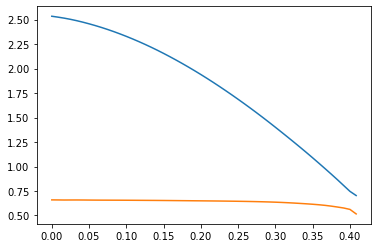

In [82]:
for f in fxl:
    plt.plot(tl, f(tl));

#### 2. Numeric data ####

In [83]:
def rhs2(t, y, k, m, g, N):
    x, v = np.split(y, 2)
    xdot = v
    vdot = np.zeros_like(v)
    vdot[0] = -N*g + k/m * (x[1] - x[0])
    vdot[1:-1] = k/m * (x[2:] - 2*x[1:-1] + x[:-2])
    vdot[-1] = k/m * (x[-2] - x[-1])
    return np.hstack((xdot, vdot))

In [84]:
# Data from our springs and masses
L0 = 0.4639
KK = 0.4399
MM = 56.6E-3
g = 9.81

In [88]:
# Simple run
k = KK * (N - 1)
m = MM
x0 = np.zeros(N)
v0 = np.zeros(N)
y0 = np.hstack((x0, v0))

soluc = solve_ivp(rhs2, [0, tl[-1]], y0, args=[k, m, g, N], max_step=0.01)
tn = soluc.t
xn, vn = (np.vsplit(soluc.y, 2))

poly_xn = [ np.polyfit(tn, x, PDEG) for x in xn ]

# O valor de dt tem que ser ajustado à mão para cada ficheiro
dt = 0.055
fxn = [ (lambda t, px=px: np.polyval(px, t+dt)) for px in poly_xn ]

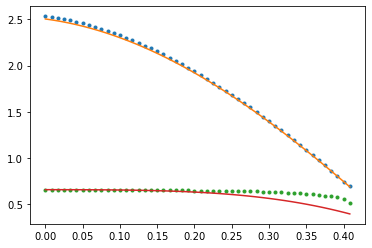

In [89]:

for i,f in enumerate(fxn):
    plt.plot(tl, xl[i],'.', tn, xl[i,0]+f(tn));

#### Aceleração do CM ####

-7.188560080819824 -7.320497406328754


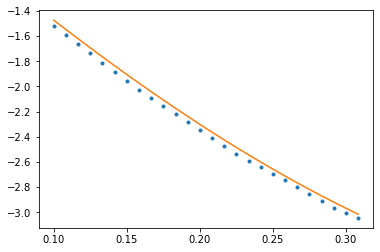

In [90]:
# Cálculo da aceleração do CM
# 1. Polinómio das velocidades de cada corpo
pvil = [ np.polyder(px, 1) for px in poly_xl]
pvin = [ np.polyder(px, 1) for px in poly_xn]

# 2. Polinómio da velocidade do CM
pvcml = pvil[0]
pvcmn = pvin[0]
for i in range(2, N):
    pvcml = np.polyadd(pvcml, pvil[i])
    pvcmn = np.polyadd(pvcmn, pvin[i])
pvcml = pvcml / N
pvcmn = pvcmn / N
vcml = np.polyval(pvcml, tl)
vcmn = np.polyval(pvcmn, tl+dt)
k = 12
plt.plot(tl[k:-k], vcml[k:-k],'.', tl[k:-k], vcmn[k:-k]);
Delta_t = tl[-k] - tl[k]
al = (vcml[-k] - vcml[k]) / Delta_t
an = (vcmn[-k] - vcmn[k]) / Delta_t
print(al,an)


A aceleração do CM da solução numérica deveria ser exatamente igual a g. Há qualquer coisa aqui que não está bem.